1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [1]:
#https://github.com/abdalmajidajmil/Models-practice-on-breast-cancer-dataset

from sklearn.datasets import load_breast_cancer
my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

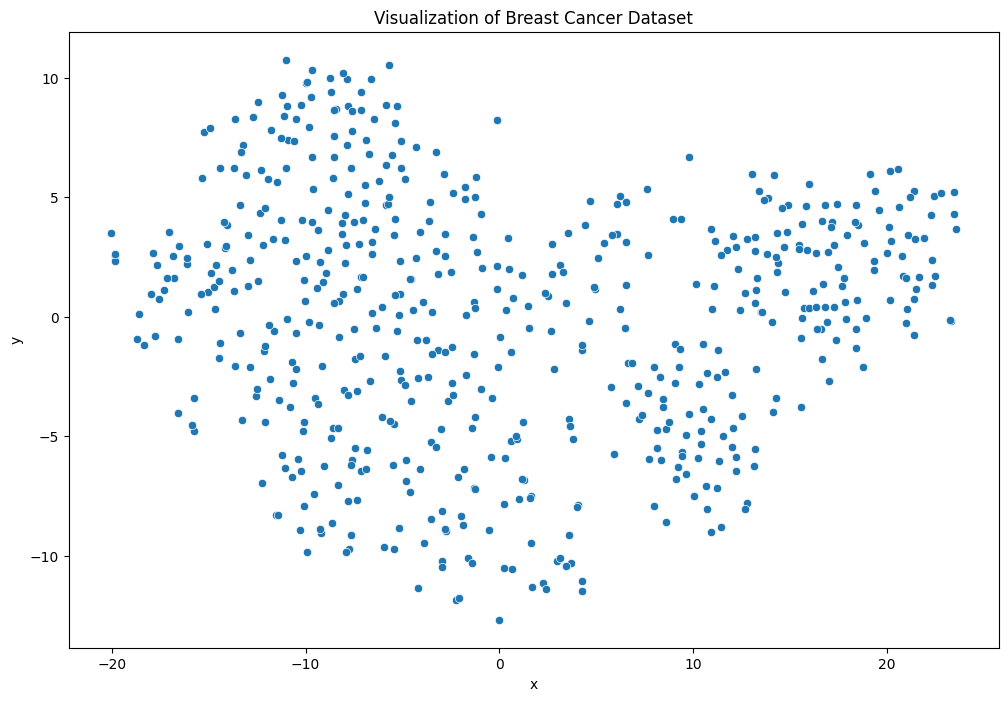

In [22]:
# normalization affects the dataset, which can disrupt the decision of the models, please run this box as the last one after running all the other boxes.

from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_df = pd.DataFrame(my_data.data, columns = my_data.feature_names)
data_array_for_tsne = data_df.values
normalized_data = (data_array_for_tsne - np.mean(data_array_for_tsne, axis=0)) / (np.std(data_array_for_tsne, axis=0))

tsne = TSNE(n_components = 2, perplexity = 50)
transformed_data = tsne.fit_transform(normalized_data)
transformed_df = pd.DataFrame(transformed_data, columns=['x', 'y'])

plt.figure(figsize=(12 , 8))
sns.scatterplot(x='x', y='y', data = transformed_df)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of Breast Cancer Dataset')
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [2]:
from sklearn.model_selection import train_test_split

X = my_data.data
y = my_data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = None, min_samples_split = 2, min_samples_leaf = 2)
model_decision_tree.fit(X_train, Y_train)

model_decision_tree_predictions = model_decision_tree.predict(X_test)
print(classification_report(Y_test, model_decision_tree_predictions))
confusion_matrix(Y_test, model_decision_tree_predictions)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



array([[37,  5],
       [ 5, 67]])

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [6]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 10, min_samples_leaf = 2, criterion='gini')
model_random_forest.fit(X_train, Y_train)

model_random_forest_predictions = model_random_forest.predict(X_test)
print(classification_report(Y_test, model_random_forest_predictions))
confusion_matrix(Y_test, model_random_forest_predictions)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



array([[39,  3],
       [ 3, 69]])

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [7]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.1, estimator = DecisionTreeClassifier(max_depth = 1), algorithm="SAMME.R")
model_adaboost.fit(X_train, Y_train)

model_ada_boost_predictions = model_adaboost.predict(X_test)
print(classification_report(Y_test, model_ada_boost_predictions))
confusion_matrix(Y_test, model_ada_boost_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



array([[39,  3],
       [ 3, 69]])

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

results = {}


def evaluat_model(model, X_test, Y_test, modlename):
    y_predct = model.predict(X_test)
    acc = accuracy_score(Y_test, y_predct)
    precisn = precision_score(Y_test, y_predct, pos_label=1)
    rec = recall_score(Y_test, y_predct, pos_label=1)
    f1 = f1_score(Y_test, y_predct, pos_label=1)
    conf_matrix = confusion_matrix(Y_test, y_predct)


    results[modlename]= {
        'Accuracy': acc,
        'Precisin': precisn,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }


evaluat_model(model_decision_tree, X_test, Y_test, "Decision Tree")
evaluat_model(model_random_forest, X_test, Y_test, "Random Forest")
evaluat_model(model_adaboost, X_test, Y_test, "Adaboost")


print(" Evaluation Metrices For Each Classifier\n")
for modlename, metrices in results.items():
    print(f"{modlename}:")
    for metr, value in metrices.items():
        print(f"  {metr}: {value} ")
    print("\n")

best_modle = None
the_best_f1 = 0
for modlename, metrices in results.items():
    if metrices['F1 Score'] > the_best_f1:
        the_best_f1 = metrices['F1 Score']
        best_modle = modlename

print(f" The best classifer based on F1 Sccore (Class 1) is {best_modle} with score of {the_best_f1:.4f}")


 Evaluation Metrics For Each Classifier

Decision Tree:
  Accuracy: 0.9122807017543859 
  Precisin: 0.9305555555555556 
  Recall: 0.9305555555555556 
  F1 Score: 0.9305555555555556 
  Confusion Matrix: [[37  5]
 [ 5 67]] 


Random Forest:
  Accuracy: 0.9473684210526315 
  Precisin: 0.9583333333333334 
  Recall: 0.9583333333333334 
  F1 Score: 0.9583333333333334 
  Confusion Matrix: [[39  3]
 [ 3 69]] 


Adaboost:
  Accuracy: 0.9473684210526315 
  Precisin: 0.9583333333333334 
  Recall: 0.9583333333333334 
  F1 Score: 0.9583333333333334 
  Confusion Matrix: [[39  3]
 [ 3 69]] 


 The best classifer based on F1 Sccore (Class 1) is Random Forest with score of 0.9583
